# Prediksi Kematian Pasien Akibat Penyakit Jantung - Supervised Learning

> Penyakit jantung merupakan salah satu penyakit yang menyebabkan kamtian cukup besar di dunia. Umumya penyakit jantung disebabkan gaya hidup tidak sehat dari pengidapnya.

> Untuk mengurangi risiko keamtian akibat penyakit jantung, kali ini saya kan membuat model supervised learning untuk memprediksi kematian pasien akibat penyakit jantung. 

> Molel ini dibuat dengan harapan tenaga kesehatan dapat lebih memfokuskan pasien dengan risiko kematian dan meminimalisir kematian yang disebabkan oleh penyakit jantung.

> Model yang akan dibuat akan menggunakan model supervised learning dengan menggunakan algoritme Random Forest den algorritme Boosting.

> Data yang akan digunakan merupakan data yang diambil dari Google Big Query dengan melakukan query sql untuk mengambil data. Berikut ini merupakan query yang digunakan untuk mengambil adata dari Google Big Query :

```
SELECT 
age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction,
high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, 
smoking, time, DEATH_EVENT
FROM 'ftds-hacktiv8-project.phase1_ftds_018_rmt.heart-failure';
```

> Berikut ini merupakan informasi dari setiap kolom yang digunakan pada project ini.

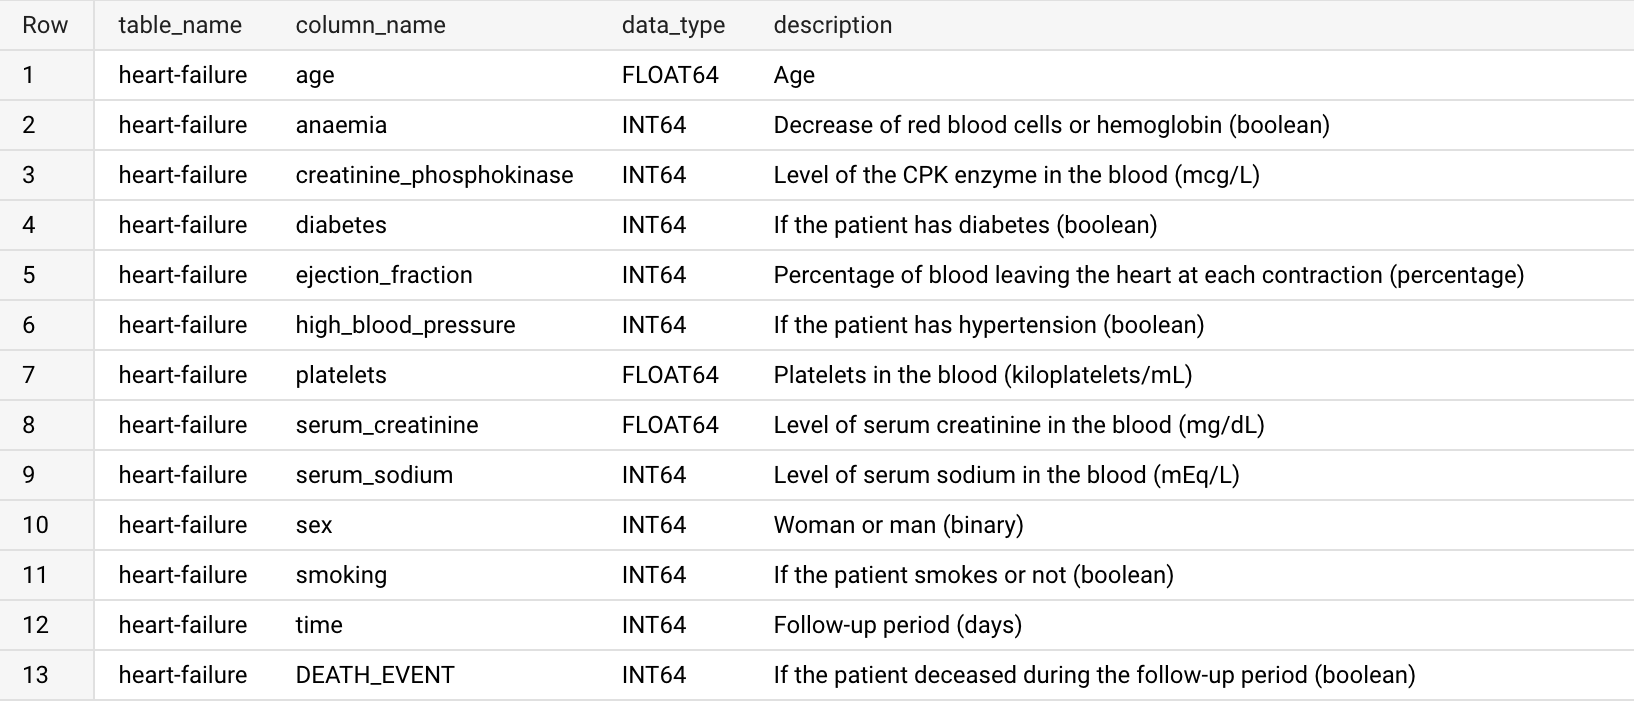

## Import Library

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score

import joblib
import json

## Import Data

In [2]:
# Import Data

data = pd.read_csv('/content/Dataset_Jantung.csv')

In [3]:
# Tampilkan head data

data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0


In [4]:
# Tampilkan Tail Data

data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


In [5]:
# Data shape

print('Data shape :', data.shape)

Data shape : (299, 13)


In [6]:
# Cek duplikasi

print('Jumlah data yeng terduplikasi :', data.duplicated().sum())

Jumlah data yeng terduplikasi : 0


In [7]:
# Cek missing value

data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

> Data yang dimiliki tidak terdapat missing value.

In [8]:
# Data describe

data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [9]:
# Cek imbalance data

data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

> Data yang dimilik merupakan data yang imbalance, akan diterapkan undersampling atau oversampling menggunakan SMOTE untuk menangani data yang imbalance.

## Faeture Engineering

### Split Data

In [10]:
# Split data menjadi X dan y

X = data.drop(['DEATH_EVENT'], axis=1)
y = data['DEATH_EVENT']

> Mambagi data menjadi X dan y, dimana y sebagai target.

In [11]:
# Split data pada X dan y menjadi data X_train, X_test dan y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=93)

> Membagi data menjadi data training dan daya testing dimana dilakukan pengacakan urutan data dan membagi 80% menjadi data training dan 20% menjadi data testing.

In [12]:
# Tampilkan shape data setelah di split menjadi data train dan data test

print('Ukuran X_train : ', X_train.shape)
print('Ukuran X_test  : ', X_test.shape)
print('Ukuran y_train : ', y_train.shape)
print('Ukuran y_test  : ', y_test.shape)

Ukuran X_train :  (239, 12)
Ukuran X_test  :  (60, 12)
Ukuran y_train :  (239,)
Ukuran y_test  :  (60,)


### Scaling / Normalisasi

In [13]:
# Dilakukan normalisasi menggunakan MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Menyimpan hasil normalisasi ke dalam dataframe

X_train_fix = pd.DataFrame(X_train_scaled)
X_test_fix = pd.DataFrame(X_test_scaled)

### Oversamling dengan SMOTE untuk handling imbalance data

In [15]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()

X_train_sm, y_train_sm = smt.fit_resample(X_train_fix, y_train)

## Random Forest Classifier

### Model Definition

In [16]:
model_rf = RandomForestClassifier()

### Model Training

In [17]:
# Model Train Menggunakan Random Forest

model_rf.fit(X_train_sm, y_train_sm)

RandomForestClassifier()

### Model Evaluation

In [18]:
# Prediksi Train Set dan Test Set Pada Model Random Forest

y_pred_train_sm = model_rf.predict(X_train_sm)
y_pred_test_sm = model_rf.predict(X_test_fix)

In [19]:
# Menampilkan Report Evaluasi Model Random Forest Train Set

print('Classification Report Random Forest Train Set: \n', classification_report(y_train_sm, y_pred_train_sm), '\n')

Classification Report Random Forest Train Set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      1.00      1.00       161

    accuracy                           1.00       322
   macro avg       1.00      1.00      1.00       322
weighted avg       1.00      1.00      1.00       322
 



In [20]:
print('Train - Accuracy Score RF SM=', accuracy_score(y_train_sm, y_pred_train_sm))
print('Test - Accuracy Score RF SM=', accuracy_score(y_test, y_pred_test_sm))

Train - Accuracy Score RF SM= 1.0
Test - Accuracy Score RF SM= 0.8833333333333333


## AdaBoostClassifier

### Model Definition

In [21]:
model_ada = AdaBoostClassifier()

### Model Training

In [22]:
# Model Train Menggunakan AdaBoostClassifier

model_ada.fit(X_train_sm, y_train_sm)

AdaBoostClassifier()

### Model Evaluation

In [23]:
# Prediksi Train Set dan Test Set Pada Model AdaBoostClassifier

y_pred_train_ada = model_ada.predict(X_train_sm)
y_pred_test_ada = model_ada.predict(X_test_fix)

In [24]:
# Menampilkan Report Evaluasi Model AdaBoostClassifier Train Set

print('Classification Report Random Forest Train Set: \n', classification_report(y_train_sm, y_pred_train_ada), '\n')

Classification Report Random Forest Train Set: 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       161
           1       0.93      0.95      0.94       161

    accuracy                           0.94       322
   macro avg       0.94      0.94      0.94       322
weighted avg       0.94      0.94      0.94       322
 



In [25]:
print('Train - Accuracy Score AdaBoostClassifier=', accuracy_score(y_train_sm, y_pred_train_ada))
print('Test - Accuracy Score AdaBoostClassifier=', accuracy_score(y_test, y_pred_test_ada))

Train - Accuracy Score AdaBoostClassifier= 0.9409937888198758
Test - Accuracy Score AdaBoostClassifier= 0.8166666666666667


## Bagging - AdaBoostClassifier

### Model Definition

In [26]:
model_bag_ada = BaggingClassifier(AdaBoostClassifier())

### Model Training

In [27]:
# Model Train Menggunakan Bagging - AdaBoostClassifier

model_bag_ada.fit(X_train_sm, y_train_sm)

BaggingClassifier(estimator=AdaBoostClassifier())

### Model Evaluation

In [28]:
# Prediksi Train Set dan Test Set Pada Model Bagging - AdaBoostClassifier

y_pred_train_bag_ada = model_bag_ada.predict(X_train_sm)
y_pred_test_bag_ada = model_bag_ada.predict(X_test_fix)

In [29]:
# Menampilkan Report Evaluasi Model Bagging - AdaBoostClassifier Train Set

print('Classification Report Random Forest Train Set: \n', classification_report(y_train_sm, y_pred_train_bag_ada), '\n')

Classification Report Random Forest Train Set: 
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       161
           1       0.90      0.96      0.93       161

    accuracy                           0.93       322
   macro avg       0.93      0.93      0.93       322
weighted avg       0.93      0.93      0.93       322
 



In [30]:
print('Train - Accuracy Score Bagging - AdaBoostClassifier=', accuracy_score(y_train_sm, y_pred_train_bag_ada))
print('Test - Accuracy Score Bagging - AdaBoostClassifier=', accuracy_score(y_test, y_pred_test_bag_ada))

Train - Accuracy Score Bagging - AdaBoostClassifier= 0.9254658385093167
Test - Accuracy Score Bagging - AdaBoostClassifier= 0.8


## Bagging - RandomForestClassifier

### Model Definition

In [31]:
model_bag_rf = BaggingClassifier(RandomForestClassifier())

### Model Training

In [32]:
# Model Train Menggunakan Bagging - RandomForestClassifier

model_bag_rf.fit(X_train_sm, y_train_sm)

BaggingClassifier(estimator=RandomForestClassifier())

### Model Evaluation

In [33]:
# Prediksi Train Set dan Test Set Pada Model Bagging - RandomForestClassifier

y_pred_train_bag_rf = model_bag_rf.predict(X_train_sm)
y_pred_test_bag_rf = model_bag_rf.predict(X_test_fix)

In [34]:
# Menampilkan Report Evaluasi Model Bagging - RandomForestClassifier Train Set

print('Classification Report Random Forest Train Set: \n', classification_report(y_train_sm, y_pred_train_bag_rf), '\n')

Classification Report Random Forest Train Set: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       161
           1       0.97      1.00      0.98       161

    accuracy                           0.98       322
   macro avg       0.98      0.98      0.98       322
weighted avg       0.98      0.98      0.98       322
 



In [35]:
print('Train - Accuracy Score Bagging - RandomForestClassifier=', accuracy_score(y_train_sm, y_pred_train_bag_rf))
print('Test - Accuracy Score Bagging - RandomForestClassifier=', accuracy_score(y_test, y_pred_test_bag_rf))

Train - Accuracy Score Bagging - RandomForestClassifier= 0.984472049689441
Test - Accuracy Score Bagging - RandomForestClassifier= 0.8666666666666667


## Model Evaluation

In [36]:
print('Model Evaluation RandomForestClassifier')

print('Train - Accuracy Score RandomForestClassifier =', accuracy_score(y_train_sm, y_pred_train_sm))
print('Test - Accuracy Score RandomForestClassifier =', accuracy_score(y_test, y_pred_test_sm))
print('\n')
print('Model Evaluation Bagging - RandomForestClassifier')

print('Train - Accuracy Score Bagging - RandomForestClassifier =', accuracy_score(y_train_sm, y_pred_train_bag_rf))
print('Test - Accuracy Score Bagging - RandomForestClassifier =', accuracy_score(y_test, y_pred_test_bag_rf))
print('\n')
print('Model Evaluation AdaBoostClassifier')

print('Train - Accuracy Score AdaBoostClassifier =', accuracy_score(y_train_sm, y_pred_train_ada))
print('Test - Accuracy Score AdaBoostClassifier =', accuracy_score(y_test, y_pred_test_ada))
print('\n')
print('Model Evaluation Bagging - AdaBoostClassifier')

print('Train - Accuracy Score Bagging - AdaBoostClassifier =', accuracy_score(y_train_sm, y_pred_train_bag_ada))
print('Test - Accuracy Score Bagging - AdaBoostClassifier =', accuracy_score(y_test, y_pred_test_bag_ada))

Model Evaluation RandomForestClassifier
Train - Accuracy Score RandomForestClassifier = 1.0
Test - Accuracy Score RandomForestClassifier = 0.8833333333333333


Model Evaluation Bagging - RandomForestClassifier
Train - Accuracy Score Bagging - RandomForestClassifier = 0.984472049689441
Test - Accuracy Score Bagging - RandomForestClassifier = 0.8666666666666667


Model Evaluation AdaBoostClassifier
Train - Accuracy Score AdaBoostClassifier = 0.9409937888198758
Test - Accuracy Score AdaBoostClassifier = 0.8166666666666667


Model Evaluation Bagging - AdaBoostClassifier
Train - Accuracy Score Bagging - AdaBoostClassifier = 0.9254658385093167
Test - Accuracy Score Bagging - AdaBoostClassifier = 0.8


> Metric yang digunakan pada model di project ini adalah metric accuracy_score. Metric tersebut digunakan karena sebelumnya sudah dilakukan balancaing data terhadap data awal yang imbalance dengan menggunakan oversampling atau SMOTE.

> Berdasarkan 4 model yang telah dibuat semua cenderung overfitting namun model yang akan digunakan pada **model inference adalah model Bagging - AdaBosstClassifier** karena rentang nilai akurasi antara train dan test tidak terlalu jauh dibanding dengan model lainnya meskipun masih cenderung overfitting.

## Model Saving

> Pada model inference akan menggunkaan Bagging - AdaBoostClassifier Model.

In [37]:
# Menyimpan Model

with open('model_bag_rf.pkl', 'wb') as file_1:
  joblib.dump(model_bag_rf, file_1)

with open('smt.pkl', 'wb') as file_2:
  joblib.dump(smt, file_2)

with open('scaler.pkl', 'wb') as file_3:
  joblib.dump(scaler, file_3)